In [ ]:
%matplotlib inline


# Multi-dimensional scaling

An illustration of the metric and non-metric MDS on generated noisy data.

The reconstructed points using the metric MDS and non metric MDS are slightly
shifted to avoid overlapping.


In [1]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

In [17]:
EPSILON

1.1920929e-07

In [2]:
EPSILON = np.finfo(np.float32).eps
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

In [3]:
X_true

array([[ 1.45, -5.55],
       [-0.55, -8.55],
       [10.45,  1.45],
       [ 2.45,  0.45],
       [ 1.45, -2.55],
       [-8.55,  3.45],
       [-1.55,  5.45],
       [ 8.45, -6.55],
       [-6.55, -7.55],
       [10.45, -3.55],
       [-0.55,  5.45],
       [-7.55,  1.45],
       [-1.55,  2.45],
       [-7.55,  6.45],
       [ 7.45, -3.55],
       [ 8.45,  5.45],
       [-8.55, -8.55],
       [ 0.45,  9.45],
       [-3.55, -1.55],
       [-3.55,  5.45]])

In [4]:
similarities = euclidean_distances(X_true)
similarities

array([[ 0.        ,  3.60555128, 11.40175425,  6.08276253,  3.        ,
        13.45362405, 11.40175425,  7.07106781,  8.24621125,  9.21954446,
        11.18033989, 11.40175425,  8.54400375, 15.        ,  6.32455532,
        13.03840481, 10.44030651, 15.03329638,  6.40312424, 12.08304597],
       [ 3.60555128,  0.        , 14.86606875,  9.48683298,  6.32455532,
        14.4222051 , 14.03566885,  9.21954446,  6.08276253, 12.08304597,
        14.        , 12.20655562, 11.04536102, 16.55294536,  9.43398113,
        16.64331698,  8.        , 18.02775638,  7.61577311, 14.31782106],
       [11.40175425, 14.86606875,  0.        ,  8.06225775,  9.8488578 ,
        19.10497317, 12.64911064,  8.24621125, 19.23538406,  5.        ,
        11.70469991, 18.        , 12.04159458, 18.68154169,  5.83095189,
         4.47213595, 21.47091055, 12.80624847, 14.31782106, 14.56021978],
       [ 6.08276253,  9.48683298,  8.06225775,  0.        ,  3.16227766,
        11.40175425,  6.40312424,  9.21954446, 1

In [5]:
# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise


In [6]:
mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    random_state=seed,
    dissimilarity="precomputed",
    n_jobs=1,
)

In [7]:
mds

MDS(dissimilarity='precomputed', eps=1e-09, max_iter=3000, n_jobs=1,
    random_state=RandomState(MT19937) at 0x24B316A7E40)

In [8]:
pos = mds.fit(similarities).embedding_

In [10]:
nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=1,
)

In [16]:
npos = nmds.fit_transform(similarities, init=pos)
npos

array([[ 1.66367114e-01,  3.35487999e-01],
       [ 1.15638133e-01,  4.23984539e-01],
       [ 3.69880623e-01, -2.49806903e-01],
       [ 2.02988703e-01, -7.46978315e-02],
       [ 1.35142118e-01,  1.74435236e-01],
       [-5.13116184e-01, -1.04703550e-02],
       [-1.16355852e-01, -3.03941388e-01],
       [ 3.20758455e-01,  2.92399806e-01],
       [-7.50179505e-02,  4.12161250e-01],
       [ 4.65014173e-01, -3.30409229e-02],
       [ 6.97731256e-04, -3.44295948e-01],
       [-5.21584047e-01,  8.89483953e-02],
       [-4.49731398e-02, -8.25361319e-02],
       [-5.88612810e-01, -2.40590620e-01],
       [ 4.96244791e-01,  1.03501401e-01],
       [ 4.08015250e-01, -4.12290588e-01],
       [-4.19421076e-01,  6.38639245e-01],
       [-8.53529668e-02, -7.29907908e-01],
       [-1.91325022e-01,  2.45795853e-01],
       [-3.57549524e-01, -3.32376708e-01]])

In [12]:
# Rescale the data
pos  *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

In [13]:
# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)
pos = clf.fit_transform(pos)
npos = clf.fit_transform(npos)

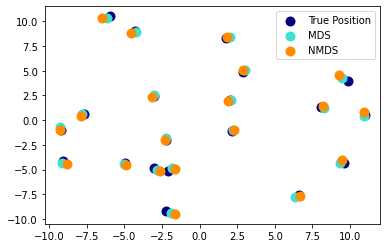

In [15]:
fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color="navy", s=s, lw=0, label="True Position")
plt.scatter(pos[:, 0], pos[:, 1], color="turquoise", s=s, lw=0, label="MDS")
plt.scatter(npos[:, 0], npos[:, 1], color="darkorange", s=s, lw=0, label="NMDS")
plt.legend(scatterpoints=1, loc="best", shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [X_true[i, :], X_true[j, :]] for i in range(len(pos)) for j in range(len(pos))
]
values = np.abs(similarities)
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, values.max())
)
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()